In [1]:
import pandas as pd
import os
print(os.path.abspath(''))
# set the path where you have downloaded the data files
file_path = os.path.abspath('train_income_data_AAII.csv')
print(file_path)
train = pd.read_csv(file_path)
# For windows, if the above paths doesn't works
# import os
# f_path = os.path.join(*['C:', 'Users', 'user', 'Desktop', 'train_income_data_AAII.csv'])
# train = pd.read_csv(f_path)
# or maybe try following to reach to the path
# absolute_path = os.path.abspath(os.path.dirname('train_income_data_AAII.csv'))


C:\Users\shahzaib\Desktop\workshop
C:\Users\shahzaib\Desktop\workshop\train_income_data_AAII.csv


In [2]:
type(train)

pandas.core.frame.DataFrame

In [3]:
train.head()

,ID,Age,Workclass,Education,Marital.Status,Occupation,Relationship,Race,Sex,Hours.Per.Week,Native.Country,Income.Group
0,1,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,2,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,3,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,4,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,5,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [4]:
# Get dimensions of your data
train.shape

(32561, 12)

## Numeric Variable

In [5]:
train.dtypes

ID                 int64
Age                int64
Workclass         object
Education         object
Marital.Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Hours.Per.Week     int64
Native.Country    object
Income.Group      object
dtype: object

In [6]:
train.describe()

,ID,Age,Hours.Per.Week
count,32561.000000,32561.000000,32561.000000
mean,16281.000000,38.581647,40.437456
std,9399.695394,13.640433,12.347429
min,1.000000,17.000000,1.000000
25%,8141.000000,28.000000,40.000000
50%,16281.000000,37.000000,40.000000
75%,24421.000000,48.000000,45.000000
max,32561.000000,90.000000,99.000000


## Categorical Variables

In [7]:
categorical_var = train.dtypes[train.dtypes=='object']
print(categorical_var)

Workclass         object
Education         object
Marital.Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Native.Country    object
Income.Group      object
dtype: object


In [8]:
categorical_var = train.dtypes[train.dtypes=='object'].index
print(categorical_var) 

Index(['Workclass', 'Education', 'Marital.Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native.Country', 'Income.Group'],
      dtype='object')


In [9]:
print(train.nunique())

ID                32561
Age                  73
Workclass             8
Education            16
Marital.Status        7
Occupation           14
Relationship          6
Race                  5
Sex                   2
Hours.Per.Week       94
Native.Country       41
Income.Group          2
dtype: int64


In [10]:
print(train[categorical_var].nunique())

Workclass          8
Education         16
Marital.Status     7
Occupation        14
Relationship       6
Race               5
Sex                2
Native.Country    41
Income.Group       2
dtype: int64


##### What happened up there??

In [11]:
train['Workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [12]:
# the len will return 9 as its also counting the NaN as 
# unique valid value
len(train['Workclass'].unique())

9

In [13]:
# Here we can see that 6 variables have less than 10 unique values but others have 15 or more unique values which seem to be too high.
# Pandas dataframes have an inbuilt routine called value_counts which gives the count of each category.
# We'll take 2 examples here to perform univariate analysis.

In [14]:
# Print counts of each category
train['Race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: Race, dtype: int64

## Data Visuzalization

### Data Visuzalization Categorical Data

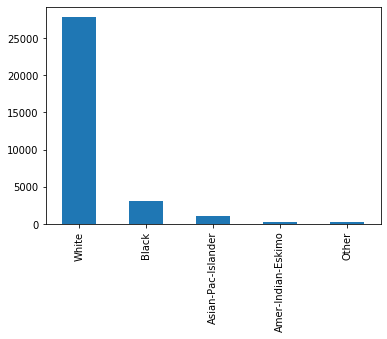

In [15]:
from matplotlib import pyplot as plt
%matplotlib inline

train['Race'].value_counts().plot(kind="bar")

In [16]:
# Percentage of observations in each category:
train['Race'].value_counts()/train.shape[0]

White                 0.854274
Black                 0.095943
Asian-Pac-Islander    0.031909
Amer-Indian-Eskimo    0.009551
Other                 0.008323
Name: Race, dtype: float64

In [17]:
race_percent = train['Race'].value_counts()/train.shape[0]*100
print(race_percent)

White                 85.427352
Black                  9.594300
Asian-Pac-Islander     3.190934
Amer-Indian-Eskimo     0.955130
Other                  0.832284
Name: Race, dtype: float64


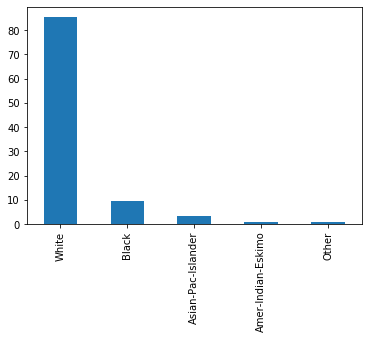

In [18]:
race_percent.plot(kind="bar")

In [19]:
# Here we observe that the top variable itself accounts for ~85% of observations and top 2 combined have ~95% of observations.
# You should keep these observations in mind. 

In [20]:
# Lets Observe Native.Country's column

In [21]:
country_percent = train['Native.Country'].value_counts()/train.shape[0]
print(country_percent)

United-States                 0.895857
Mexico                        0.019748
Philippines                   0.006081
Germany                       0.004207
Canada                        0.003716
Puerto-Rico                   0.003501
El-Salvador                   0.003255
India                         0.003071
Cuba                          0.002918
England                       0.002764
Jamaica                       0.002488
South                         0.002457
China                         0.002303
Italy                         0.002242
Dominican-Republic            0.002150
Vietnam                       0.002058
Guatemala                     0.001966
Japan                         0.001904
Poland                        0.001843
Columbia                      0.001812
Taiwan                        0.001566
Haiti                         0.001351
Iran                          0.001321
Portugal                      0.001136
Nicaragua                     0.001044
Peru                     

In [22]:
# Here we see that around 89.5 % of our training data belongs to United States

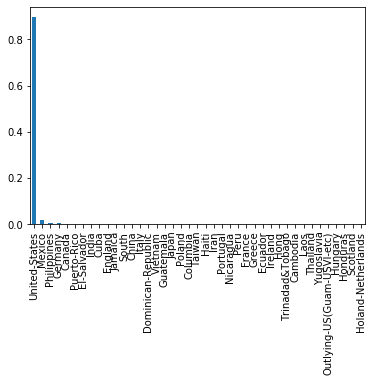

In [23]:
country_percent.plot(kind="bar")

### Data Visuzalization Numeric Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E3047BD1D0>]],
      dtype=object)

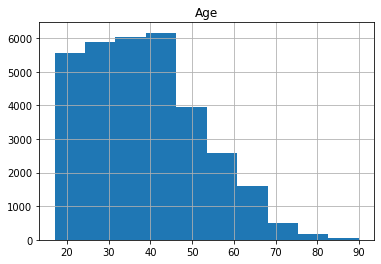

In [24]:
train.hist('Age')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E30565EAC8>]],
      dtype=object)

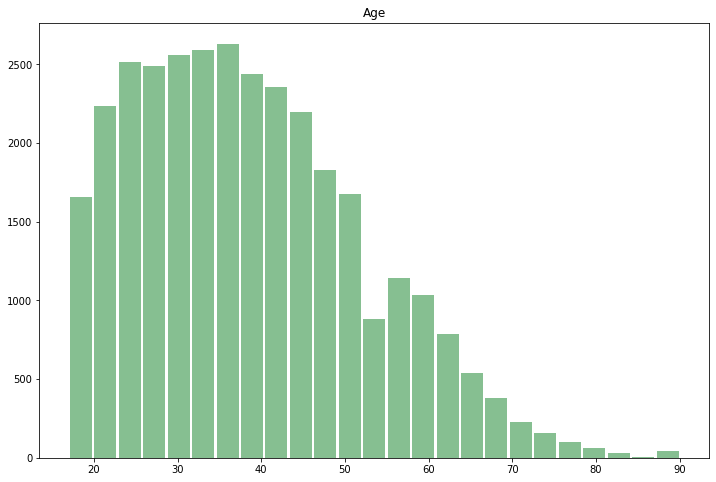

In [25]:
train.hist(column='Age', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

## Multivariate Analysis

# There are three ways we can perform Multivariate Analysis

    categorical vs categorical </br>
    continuous vs continuous </br>
    categorical vs continuous </br>


### Analysis of Continous vs Continous variables

In [26]:
train.dtypes

ID                 int64
Age                int64
Workclass         object
Education         object
Marital.Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Hours.Per.Week     int64
Native.Country    object
Income.Group      object
dtype: object

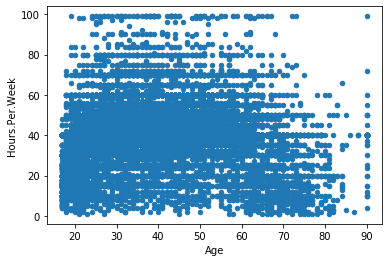

In [27]:
train.plot('Age','Hours.Per.Week', kind='Scatter')

### Analysis of Categorical vs Continous variables

In [28]:
# Mean
grouped = train.groupby('Sex')['Hours.Per.Week'].mean()
print(grouped)

Sex
Female    36.410361
Male      42.428086
Name: Hours.Per.Week, dtype: float64


In [29]:
# Median
train.groupby('Sex')['Hours.Per.Week'].median()

Sex
Female    40
Male      40
Name: Hours.Per.Week, dtype: int64

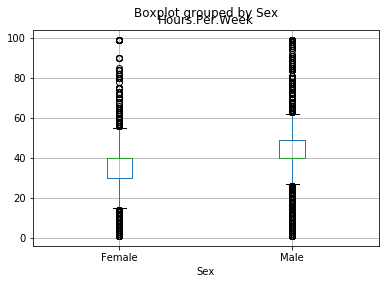

In [30]:
train.boxplot(column='Hours.Per.Week',by='Sex')

In [31]:
# Mean
train.groupby('Sex')['Age'].mean()

Sex
Female    36.858230
Male      39.433547
Name: Age, dtype: float64

In [32]:
# Median
train.groupby('Sex')['Age'].median()

Sex
Female    35
Male      38
Name: Age, dtype: int64

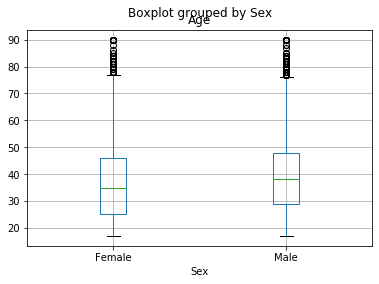

In [33]:
train.boxplot(column='Age',by='Sex')

### Analysis of Categorical vs Categorical variables

In [34]:
cross_tab = pd.crosstab(train['Sex'],train['Income.Group'])
print(cross_tab)

Income.Group  <=50K  >50K
Sex                      
Female         9592  1179
Male          15128  6662


In [35]:
type(cross_tab)

pandas.core.frame.DataFrame

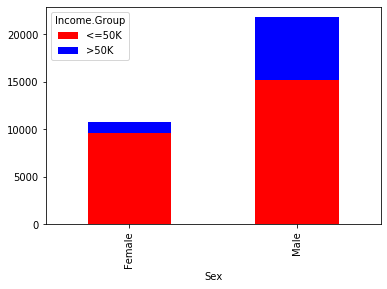

In [36]:
%matplotlib inline
cross_tab.plot(kind='bar',stacked=True, color=['red','blue'], grid=False)

#### Exporting the Data

In [37]:
new_file_path = os.path.abspath('export_file.csv')

cross_tab.to_csv(new_file_path,sep=',', encoding='utf-8')